<a href="https://colab.research.google.com/github/chandrugunaruthvi/NLPAccidentChatbotAIML/blob/main/Chandru_NLP_Capstone_Project_Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Capstone Project - EHS Chatbot on Accident Level Prediction**

## **Initial Set-ups for Colab**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Set your project path 
project_path =  "/content/drive/MyDrive/AIML/Capstone Project/"

##**Import necessary libraries for EDA**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import holoviews as hv
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import nltk
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS

##**Reading and Exploring the Data**

In [5]:
df = pd.read_csv(project_path+"IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,01-01-16 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,02-01-16 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,06-01-16 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,08-01-16 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,10-01-16 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [6]:
df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [7]:
df.shape

(425, 11)



> **There are 11 columns that includes unnamed**

> **There are 425 datasets**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB




> **All attributes are Object type. Unnamed have no relevancy and can be dropped**



In [9]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
df.shape

(425, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


> **Unnamed dropped**

> **Rename & Correct the column names for ease of referrence**

In [12]:
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Local':'Locality', 'Industry Sector':'Sector', 'Genre':'Gender', 'Employee or Third Party':'Employee type', 'Critical Risk':'Risk Type'}, inplace=True)

In [13]:
df.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description
0,01-01-16 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-16 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-16 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-16 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-16 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


### **Check for missing values**

In [14]:
# Checking Null colunms
df_null = df.isnull().sum()
df_null

Date                        0
Country                     0
Locality                    0
Sector                      0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Risk Type                   0
Description                 0
dtype: int64

> **There is no missing data in given dataset. Hence no need to process missing values**

### **Process the Date column and add columns for the day, weekday, month, quarter to evaluate any accident levels relations with periods across every year**

In [15]:
df['Date'] = pd.to_datetime(df['Date']) #To consider the column as Date time series
df['Year'] = df['Date'].apply(lambda x : x.year) #Extract the year of that incident as separate column
df['Month'] = df['Date'].apply(lambda x : x.month) #Extract the month of that incident as separate column
df['Day'] = df['Date'].apply(lambda x : x.day) #Extract the day the incident occured in the month as separate column
df['Weekday'] = df['Date'].apply(lambda x : x.day_name()) #Extract the Weekday of the incident date as separate column
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear) #Extract the week of the incident in the year as separate column

In [16]:
df.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-02-01,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5
2,2016-06-01,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22
3,2016-08-01,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31
4,2016-10-01,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39


**In general the Season or Weather also a major contributor for any incidents, like Winter invite cold related issues, Summer invite hot stroke related health and safety concers, Monsoon invite slippery kind of safety issues, etc**

**Let's develop the column that identify season when incident occured**

**The data is collected from Brazil which is located in the Southern Hemisphere, its seasons are the exact opposite of what Northern Hemisphere residents.**
> **Summer** is December through Febraury

> **Autumn** is March through May

> **Winter** is June through August

> **Spring** is Septemner through November

>  Within the country the climate varies considerably from region to region.

**Create the season column based on the month column that was extracted from the date of incident**

In [17]:
#Define the function to create seasons from month
def m2s(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [18]:
#Creast the column Season passing the 'Month' data in above defined m2s function.
df['Season'] = df['Month'].apply(m2s)
df.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-02-01,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Summer
2,2016-06-01,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter
3,2016-08-01,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31,Winter
4,2016-10-01,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39,Spring


## **EDA**

### **Univariate Analysis**

Total Unique values in countries :  3
Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64


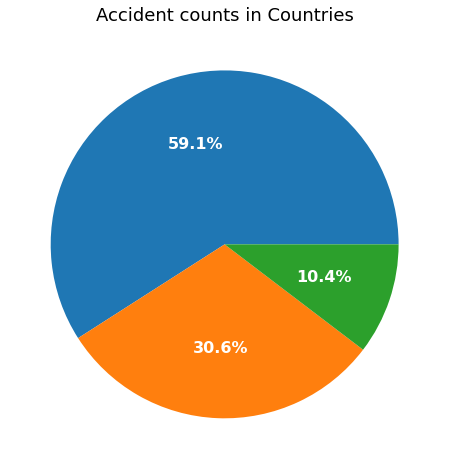

In [19]:
df_country = df["Country"].value_counts()
print ('Total Unique values in countries : ',  df_country.shape[0])
print (df_country)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(df_country, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accident counts in Countries", fontsize=18);

> **Total 3 countries data available**

> **Country_01 recorded with highest incident (59%) amongst all 3 countries**

> **Country_01 recorded lowest (10.4%) amongst all 3 countires**


In [20]:
autotexts

[Text(-0.16845910621432916, 0.5758658954422196, '59.1%'),
 Text(-0.024386889390315854, -0.5995041948359198, '30.6%'),
 Text(0.5685430350088531, -0.1917258911647616, '10.4%')]

Total Unique values in Locals :  12
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Locality, dtype: int64


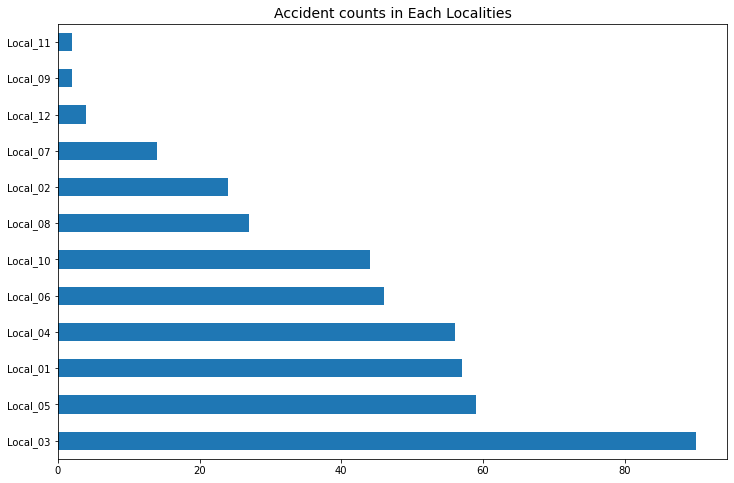

In [21]:
df_Local = df["Locality"].value_counts()
print ('Total Unique values in Locals : ',  df_Local.shape[0])
print (df_Local)

plt.figure(figsize=(12,8))
df_Local.plot.barh();
plt.title("Accident counts in Each Localities", fontsize=14);

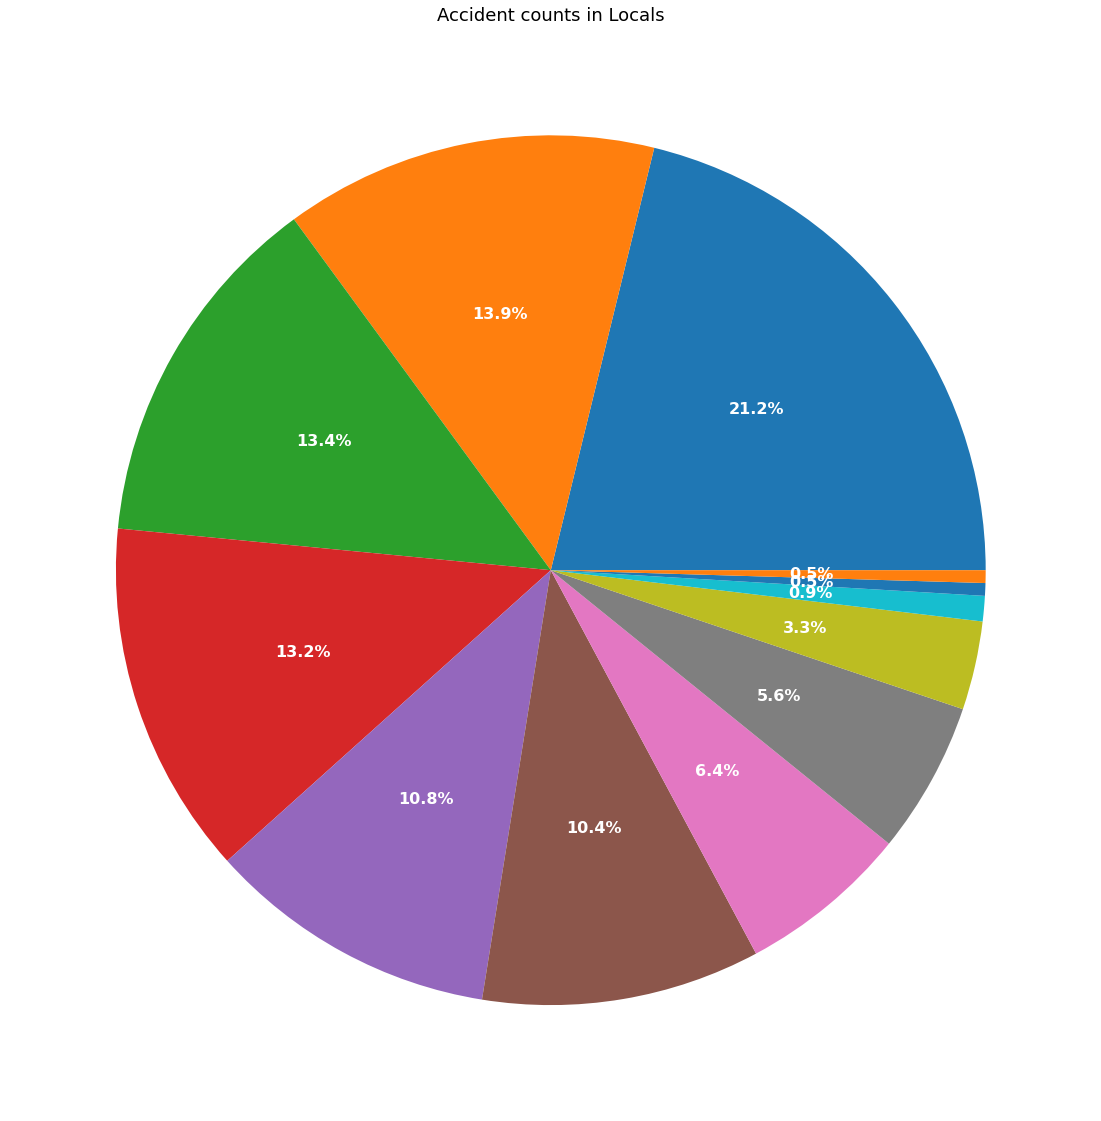

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
wedges, texts, autotexts = ax.pie(df_Local, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accident counts in Locals", fontsize=18);

> **Total 12 localities data from 3 countries captured**

> **Local_03 recorded with highest incident amongst all 12 countries**

> **9 out of 12 localities have double digit incidents**

> **3 localities have single digit low incidents**


Total Unique values in each Sector :  3
Mining    241
Metals    134
Others     50
Name: Sector, dtype: int64


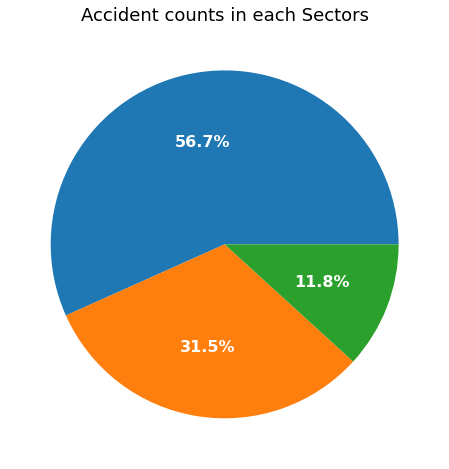

In [23]:
df_sector = df["Sector"].value_counts()
print ('Total Unique values in each Sector : ',  df_sector.shape[0])
print (df_sector)

fig,ax= plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(df_sector, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accident counts in each Sectors", fontsize=18);

> **Total 3 Industrial sectors covered**

> **Mining recorded with highest incident - 56.7%**

> **Metals stands high next to Mining Sector - 31.5%**

> **Other sectors contribute lowest incidents - 11.8%**


Total Unique values in Accident Level :  5
I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64


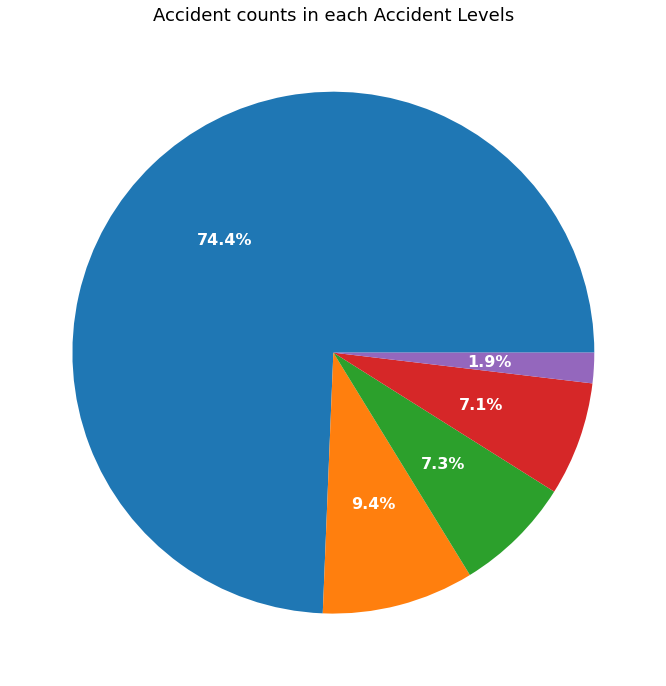

In [24]:
df_AccLevel = df["Accident Level"].value_counts()
print ('Total Unique values in Accident Level : ',  df_AccLevel.shape[0])
print (df_AccLevel)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_AccLevel, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accident counts in each Accident Levels", fontsize=18);

> **Accident Level - I occured at high frequency 74.4%**

> **Accident Level - V occured at low frequency 1.9%**

> **High Level accidents are lower and Low Level accidents are higher**

Total Unique values in Proactive Accident Level :  6
IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64


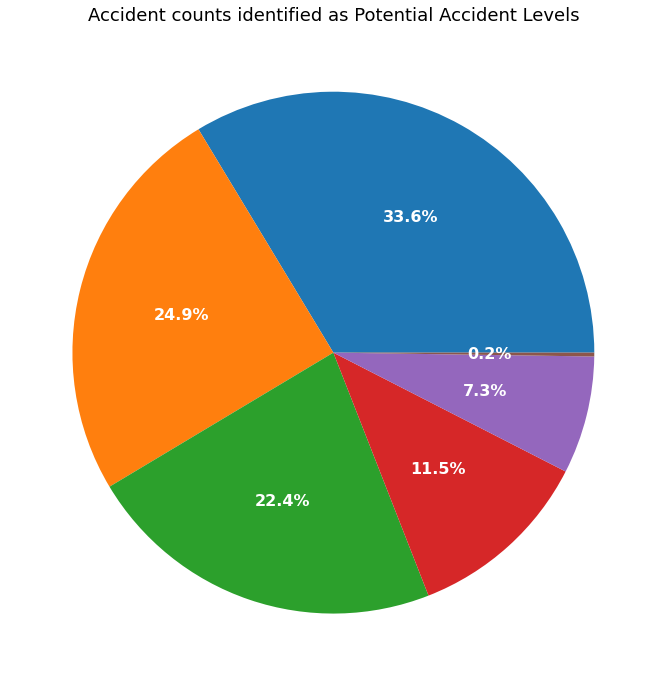

In [25]:
df_PAL = df["Potential Accident Level"].value_counts()
print ('Total Unique values in Proactive Accident Level : ',  df_PAL.shape[0])
print (df_PAL)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_PAL, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accident counts identified as Potential Accident Levels", fontsize=18);

> **Predicted Potential Accident Level - IV is at high frequency 33.6%**

> **Predicted Potential Accident Level - VI is just 1 occasio - 0.2%**

> **Actual Accident levels are different than Predicted Potential Accident Level**

Unique Values in Gender :  2
Male      403
Female     22
Name: Gender, dtype: int64


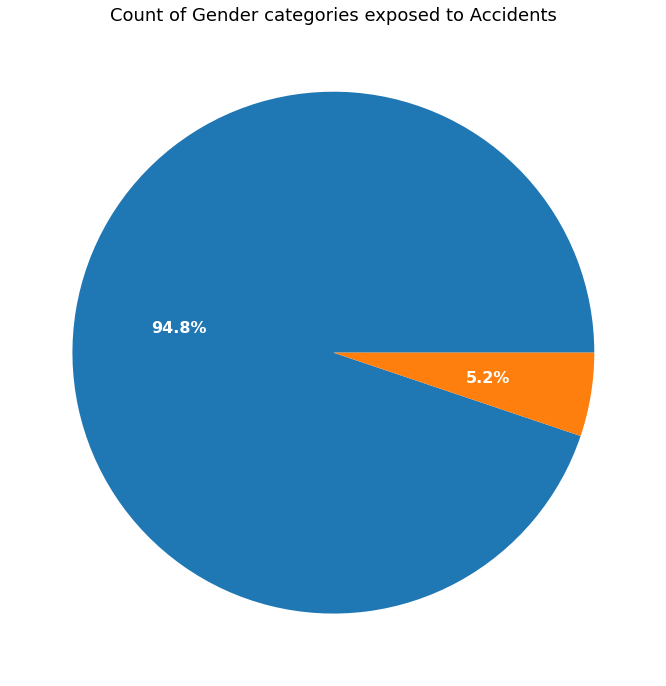

In [26]:
df_gender = df["Gender"].value_counts()
print ('Unique Values in Gender : ',  df_gender.shape[0])
print (df_gender)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_gender, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Count of Gender categories exposed to Accidents", fontsize=18);

> **Males are high prone to exposed to Accident (94.8% compare to Females (5.2%)**

Unique count of Employee type :  3
Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee type, dtype: int64


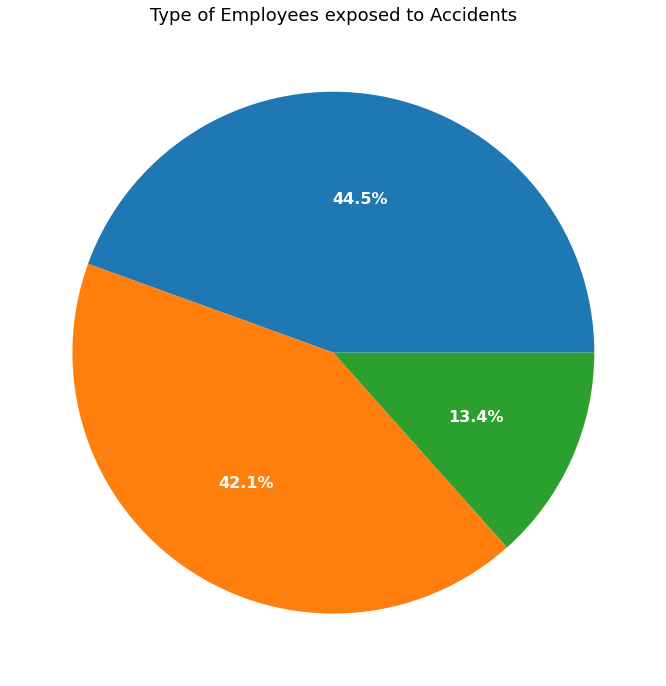

In [27]:
df_et = df["Employee type"].value_counts()
print ('Unique count of Employee type : ',  df_et.shape[0])
print (df_et)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_et, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Type of Employees exposed to Accidents", fontsize=18);

> **Third Party Employees and Direct Employees are more prone to Accident than Remote working third party**

Total type of Risks :  33
Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Pressurized Systems                            7
Fall prevention (same level)                   7
remains of choco                               7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Power lock                                     3
Liquid Metal                                   3
Pressurized Systems / Chemical Substances      3
Machine Protection                         

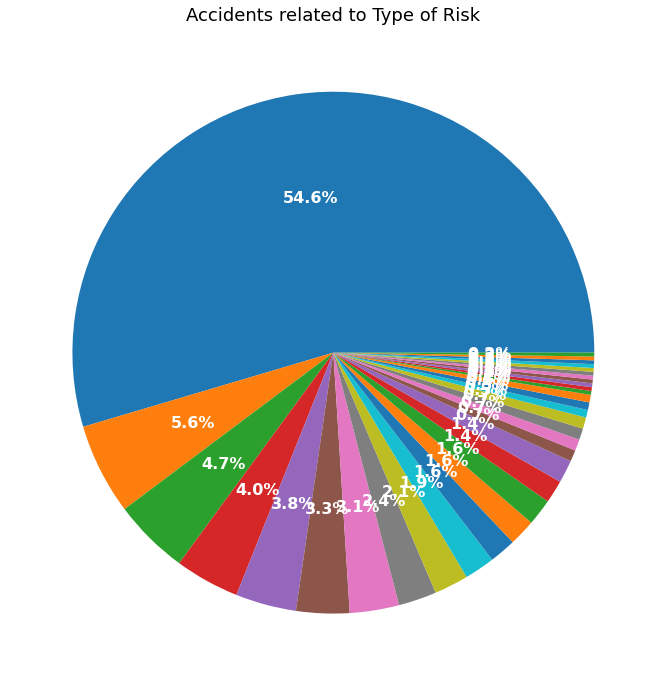

In [28]:
df_rt = df["Risk Type"].value_counts()
print ('Total type of Risks : ',  df_rt.shape[0])
print (df_rt)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_rt, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accidents related to Type of Risk", fontsize=18);

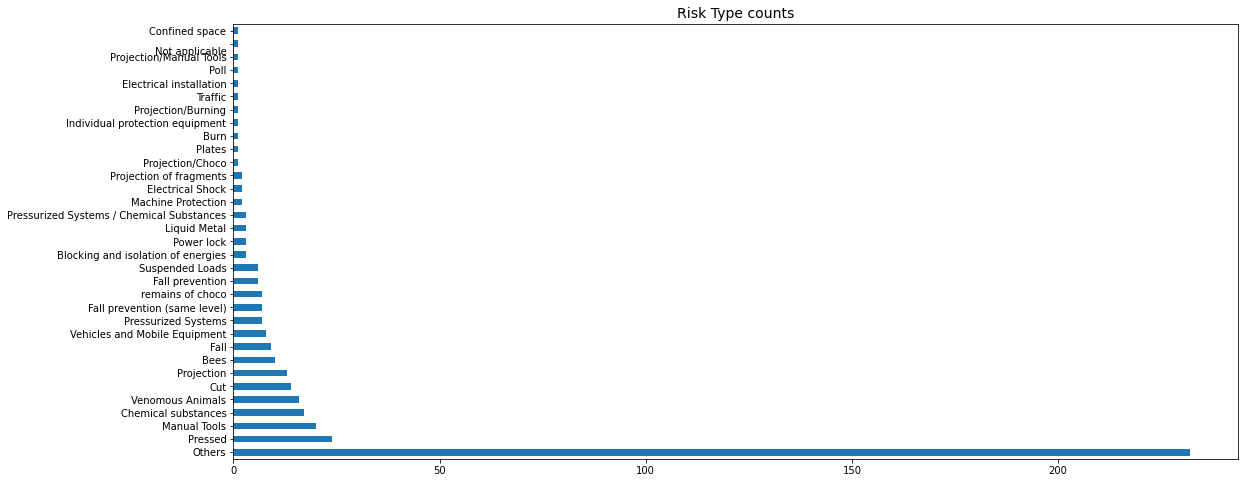

In [29]:
plt.figure(figsize=(18,8))
df_rt.plot.barh();
plt.title("Risk Type counts", fontsize=14);

> **Accidents are categories into 33 types of Risk Types**

> **Undefined other type of Risks contribute to 54.6% accident**

> **It indicates deep investigation and proactive approaches - FMEA/RCA are needed to identify the type of risks**

No. of Years in dataset :  2
2016    285
2017    140
Name: Year, dtype: int64


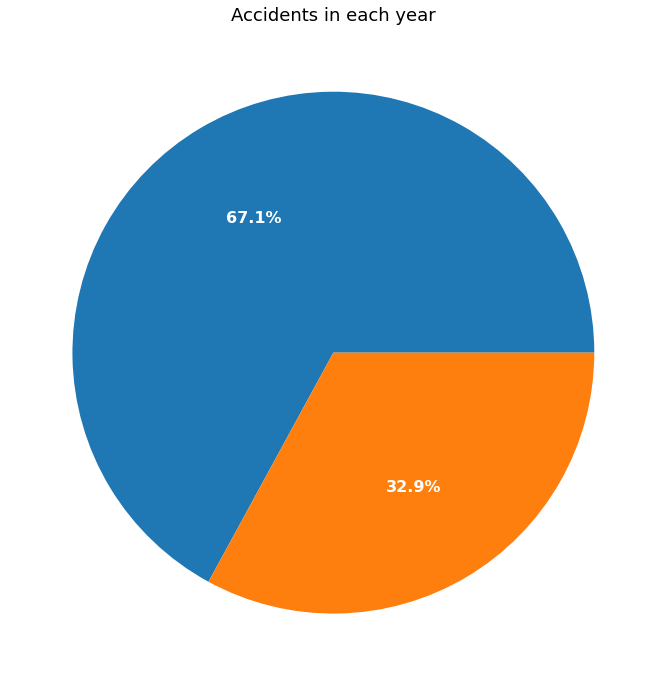

In [30]:
df_yr = df["Year"].value_counts()
print ('No. of Years in dataset : ',  df_yr.shape[0])
print (df_yr)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_yr, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accidents in each year", fontsize=18);

> **Y-2017 Accident is halved Y-2016 - Good controls in Accidents and safety performance**

Unique number of months the accident occured :  12
2     55
4     50
6     43
3     39
1     39
8     38
5     37
11    27
9     27
12    25
10    24
7     21
Name: Month, dtype: int64


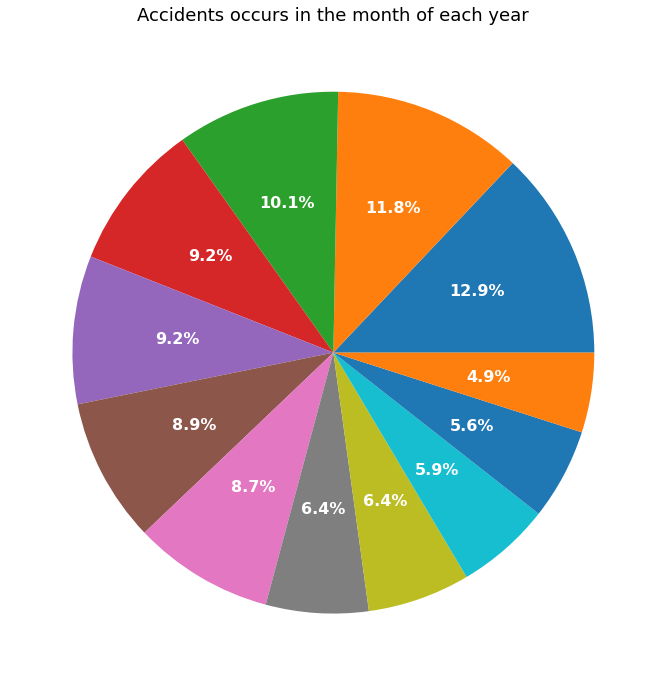

In [31]:
df_mn = df["Month"].value_counts()
print ('Unique number of months the accident occured : ',  df_mn.shape[0])
print (df_mn)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_mn, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accidents occurs in the month of each year", fontsize=18);

> **In general Accident occurs through the year irrespective of months**

> **However in the month of Feb and Apr accident level is high**

> **July, Oct & Dec have 50% of reduced accident level than Feb & Apr**

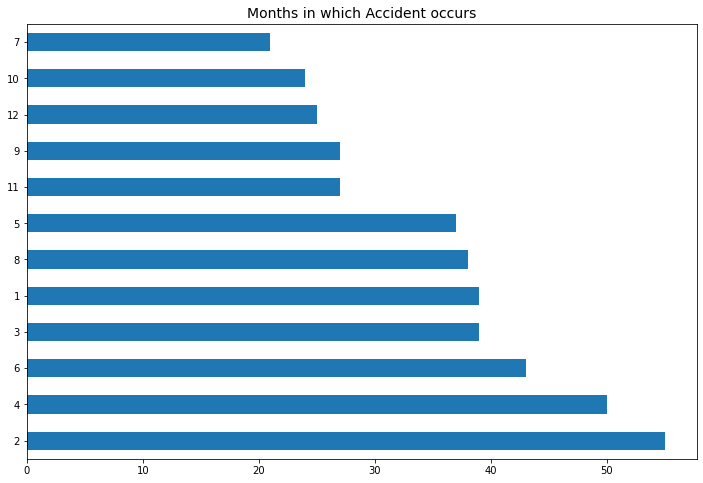

In [32]:
plt.figure(figsize=(12,8))
df_mn.plot.barh();
plt.title("Months in which Accident occurs", fontsize=14);

Unique number of Date of the month the accident occured :  31
3     24
4     24
2     21
6     21
16    19
5     18
23    17
22    17
1     17
24    16
17    15
25    15
15    15
13    15
18    15
30    14
7     14
14    12
29    12
19    11
20    11
12    10
21    10
10    10
9      9
26     9
27     9
8      8
31     7
28     6
11     4
Name: Day, dtype: int64


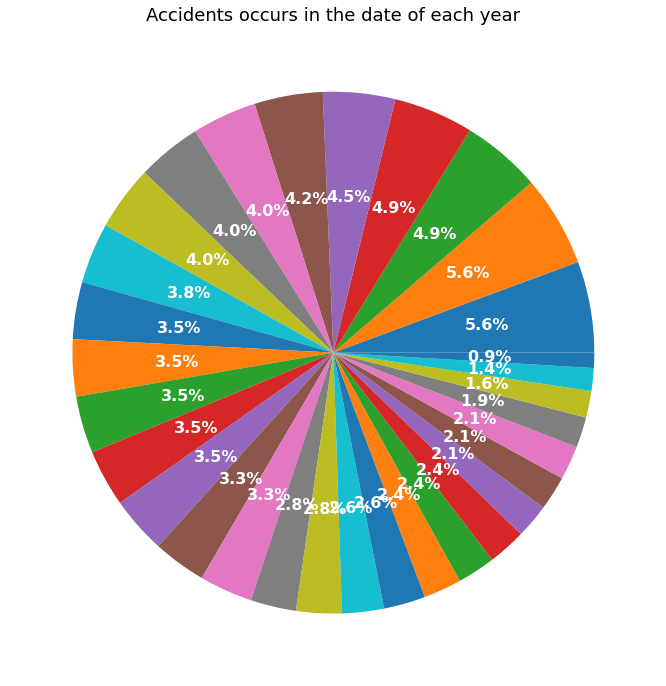

In [33]:
df_dy = df["Day"].value_counts()
print ('Unique number of Date of the month the accident occured : ',  df_dy.shape[0])
print (df_dy)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_dy, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accidents occurs in the date of each year", fontsize=18);

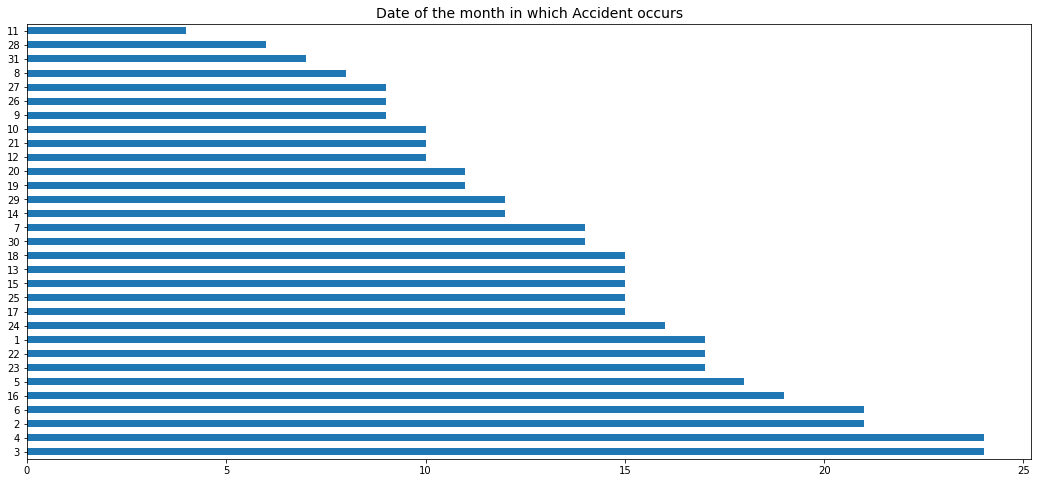

In [34]:
plt.figure(figsize=(18,8))
df_dy.plot.barh();
plt.title("Date of the month in which Accident occurs", fontsize=14);

> **Beginning of every month have more accidents.**

> **End of the the month relatively accidents are at lower side**

Unique number of Weekdays in the every week the accident occured :  7
Thursday     76
Tuesday      67
Friday       64
Saturday     62
Monday       61
Wednesday    57
Sunday       38
Name: Weekday, dtype: int64


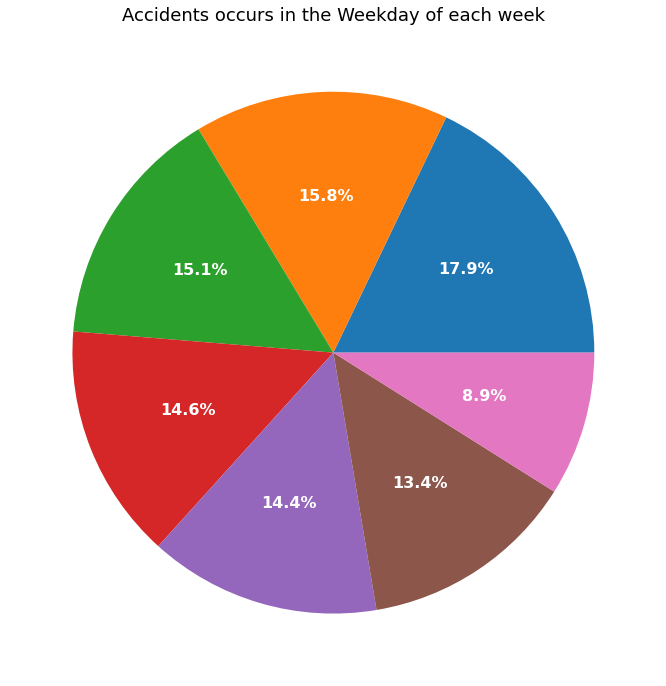

In [35]:
df_wd = df["Weekday"].value_counts()
print ('Unique number of Weekdays in the every week the accident occured : ',  df_wd.shape[0])
print (df_wd)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_wd, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accidents occurs in the Weekday of each week", fontsize=18);

> **Except Sunday all other days there is a accident**

> **However Sunday also Accident occurs**

Unique Week numbers the accident occured :  53
7     21
31    20
14    17
24    14
5     14
8     14
25    14
11    13
18    13
17    13
20    12
1     11
13    10
35    10
45    10
4     10
44     9
21     9
9      8
15     8
16     8
50     8
3      8
22     8
12     8
10     7
27     7
40     7
38     7
32     7
26     6
37     6
2      6
48     6
39     6
23     6
43     5
51     5
41     5
34     5
49     5
6      5
36     4
52     4
29     4
42     4
47     4
28     3
33     3
30     3
19     2
53     2
46     1
Name: WeekofYear, dtype: int64


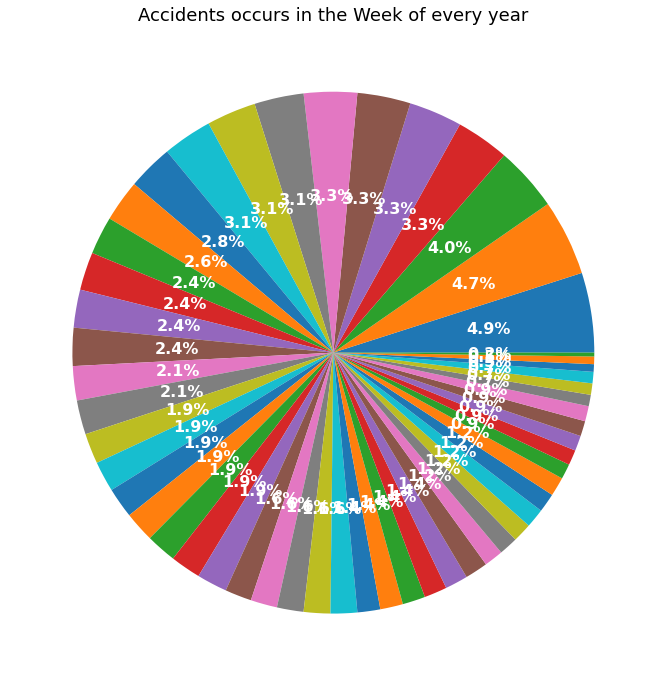

In [36]:
df_woy = df["WeekofYear"].value_counts()
print ('Unique Week numbers the accident occured : ',  df_woy.shape[0])
print (df_woy)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_woy, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accidents occurs in the Week of every year", fontsize=18);

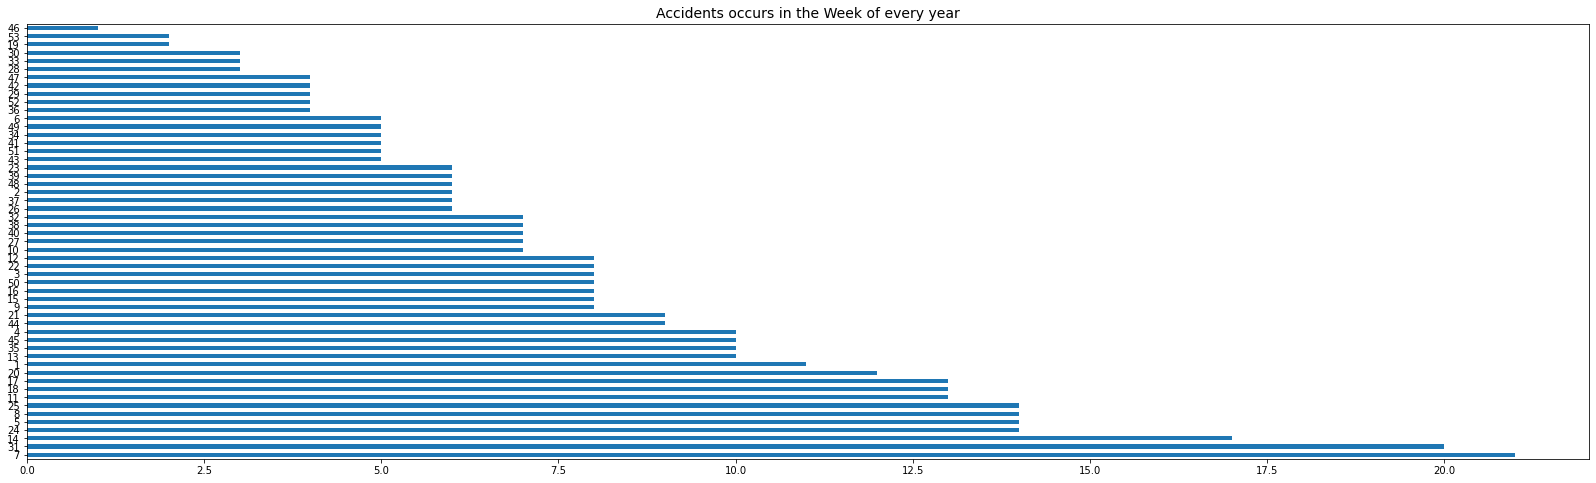

In [37]:
plt.figure(figsize=(28,8))
df_woy.plot.barh();
plt.title("Accidents occurs in the Week of every year", fontsize=14);

Unique seasons :  4
Autumn    126
Summer    119
Winter    102
Spring     78
Name: Season, dtype: int64


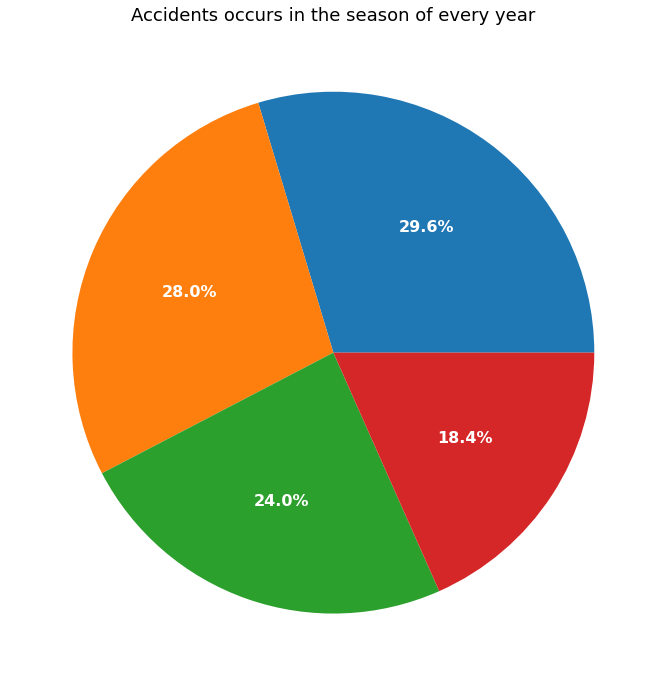

In [38]:
df_ss = df["Season"].value_counts()
print ('Unique seasons : ',  df_ss.shape[0])
print (df_ss)

fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_ss, autopct="%.1f%%", textprops=dict(color="w"))
plt.setp(autotexts, size=16, weight="bold")
plt.title("Accidents occurs in the season of every year", fontsize=18);

> **Almost equal amount of accident occurs across all seasons except Spring**

## **Bivariate Analysis**

In [43]:
df.columns

Index(['Date', 'Country', 'Locality', 'Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Risk Type',
       'Description', 'Year', 'Month', 'Day', 'Weekday', 'WeekofYear',
       'Season'],
      dtype='object')